In [85]:
import pandas as pd


In [86]:

Largclass = '/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv'


dataset = pd.read_csv(Largclass)


In [87]:
dataset.head()


,loc,lloc,scloc,comments,single_comments,multi_comments,blanks,h1,h2,n1,n2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs,Experince Based
0,235,131,136,9,9,60,30,7,35,21,41,42,62,199.176390,334.323680,4.100000,1370.727089,76.151505,0.111441,1
1,162,64,67,20,20,49,26,9,28,19,38,37,57,163.135263,296.938842,6.107143,1813.447927,100.747107,0.098980,1
2,56,49,47,2,1,0,8,7,27,20,37,34,57,148.033447,289.985382,4.796296,1390.855813,77.269767,0.096662,1
3,49,23,45,3,3,0,1,1,3,2,4,4,6,4.754888,12.000000,0.666667,8.000000,0.444444,0.004000,1
4,166,128,119,23,23,0,24,15,76,58,109,91,167,533.445850,1086.801705,10.756579,11690.268340,649.459352,0.362267,1


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
dataset.keys()

Index(['loc', 'lloc', 'scloc', 'comments', 'single_comments', 'multi_comments',
       'blanks', 'h1', 'h2', 'n1', 'n2', 'vocabulary', 'length',
       'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs',
       'Experince Based '],
      dtype='object')

In [90]:
dataset['Experince Based ']


0      1
1      1
2      1
3      1
4      1
      ..
811    0
812    0
813    0
814    0
815    0
Name: Experince Based , Length: 816, dtype: int64

In [91]:
value = dataset.iat[1, 19]


In [92]:
X = dataset.iloc[:, 0:19]

In [93]:
#X = dataset[dataset.columns[19]]

In [94]:
y = dataset.iloc[:,19]

In [95]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


In [96]:
X_train.shape

(652, 19)

In [97]:
X_test.shape

(164, 19)

In [98]:
y_train.shape

(652,)

In [99]:
y_test.shape

(164,)

In [100]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()



In [101]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [102]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred = clf.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
print(confusion_matrix(y_test, y_pred))

[[127   4]
 [  4  29]]


In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       131
           1       0.88      0.88      0.88        33

    accuracy                           0.95       164
   macro avg       0.92      0.92      0.92       164
weighted avg       0.95      0.95      0.95       164



In [108]:
clf.feature_importances_

array([1.86227417e-02, 0.00000000e+00, 8.44788574e-01, 4.76723402e-05,
       1.21775716e-02, 0.00000000e+00, 4.09114309e-02, 0.00000000e+00,
       9.13381451e-03, 9.33919022e-03, 0.00000000e+00, 6.48554876e-03,
       0.00000000e+00, 0.00000000e+00, 2.77508301e-02, 2.11115862e-02,
       0.00000000e+00, 9.63103992e-03, 0.00000000e+00])

In [109]:
features = pd.DataFrame(clf.feature_importances_, index = X.columns)

In [110]:
features.head(19)

,0
loc,0.018623
lloc,0.000000
scloc,0.844789
comments,0.000048
single_comments,0.012178
multi_comments,0.000000
blanks,0.040911
h1,0.000000
h2,0.009134
n1,0.009339


In [111]:
clf2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)

In [112]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [113]:
y_pred2 = clf2.predict(X_test)

In [114]:
print(confusion_matrix(y_test, y_pred2))

[[123   8]
 [  2  31]]


In [115]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       131
           1       0.79      0.94      0.86        33

    accuracy                           0.94       164
   macro avg       0.89      0.94      0.91       164
weighted avg       0.95      0.94      0.94       164



In [116]:
features2 = pd.DataFrame(clf2.feature_importances_, index = X.columns)

In [117]:
features2.head(19)

,0
loc,0.0
lloc,0.0
scloc,1.0
comments,0.0
single_comments,0.0
multi_comments,0.0
blanks,0.0
h1,0.0
h2,0.0
n1,0.0


In [118]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [119]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9512195121951219

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[127,   4],
       [  4,  29]])

In [122]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8787878787878788

In [123]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.8787878787878788

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97       131
      benign       0.88      0.88      0.88        33

    accuracy                           0.95       164
   macro avg       0.92      0.92      0.92       164
weighted avg       0.95      0.95      0.95       164



In [125]:
feature_names = X.columns
feature_names

Index(['loc', 'lloc', 'scloc', 'comments', 'single_comments', 'multi_comments',
       'blanks', 'h1', 'h2', 'n1', 'n2', 'vocabulary', 'length',
       'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs'],
      dtype='object')

In [126]:
clf.feature_importances_

array([1.86227417e-02, 0.00000000e+00, 8.44788574e-01, 4.76723402e-05,
       1.21775716e-02, 0.00000000e+00, 4.09114309e-02, 0.00000000e+00,
       9.13381451e-03, 9.33919022e-03, 0.00000000e+00, 6.48554876e-03,
       0.00000000e+00, 0.00000000e+00, 2.77508301e-02, 2.11115862e-02,
       0.00000000e+00, 9.63103992e-03, 0.00000000e+00])

In [127]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
scloc,0.844789
blanks,0.040911
volume,0.027751
difficulty,0.021112
loc,0.018623
single_comments,0.012178
time,0.009631
n1,0.009339
h2,0.009134
vocabulary,0.006486


In [128]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['scloc',
 'blanks',
 'volume',
 'difficulty',
 'loc',
 'single_comments',
 'time',
 'n1',
 'h2',
 'vocabulary',
 'comments']

<Axes: >

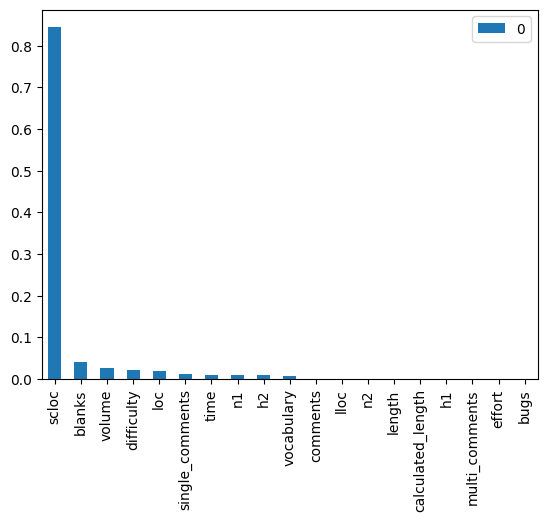

In [129]:
feature_importance.head(20).plot(kind='bar')

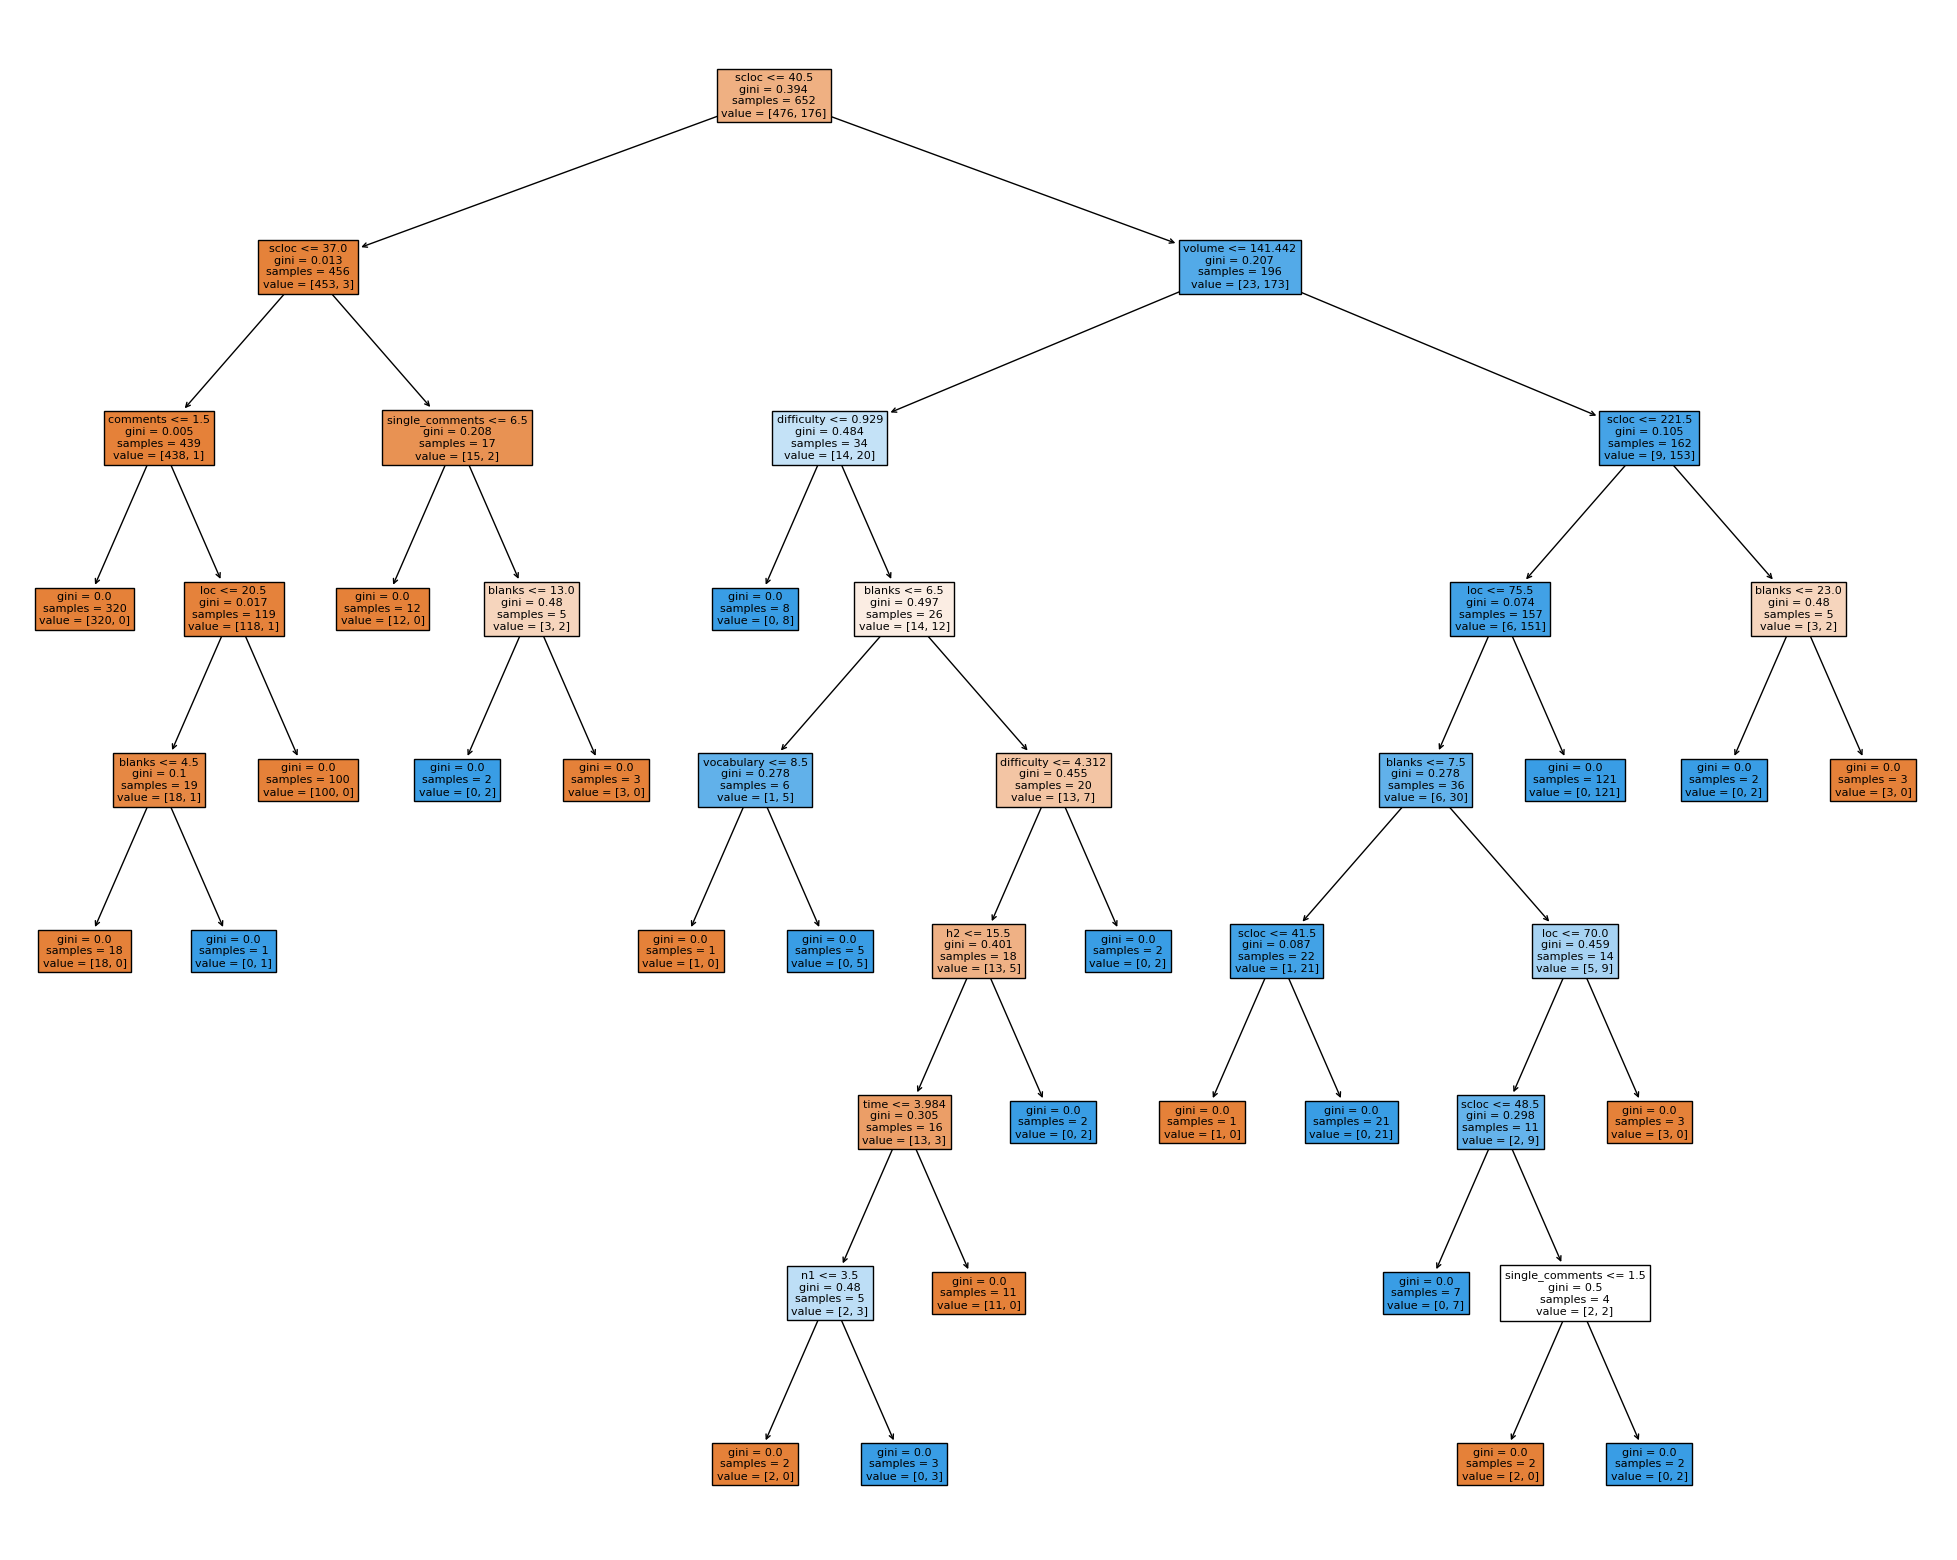

In [130]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained DecisionTreeClassifier object
fig = plt.figure(figsize=(25, 20))
plot_tree(clf, filled=True, feature_names=dataset.columns)
plt.show()


In [131]:
# follow the first example on the tree to explain the decision_path function output
X_test.head()

,loc,lloc,scloc,comments,single_comments,multi_comments,blanks,h1,h2,n1,n2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs
662,18,17,17,0,0,0,1,3,5,3,6,8,9,16.364528,27.000000,1.800000,48.600000,2.700000,0.009000
15,59,50,45,9,9,0,5,4,9,9,16,13,25,36.529325,92.510993,3.555556,328.927975,18.273776,0.030837
171,159,10,13,0,0,122,24,1,2,1,2,3,3,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585
644,14,13,11,0,1,0,2,2,5,4,7,7,11,13.609640,30.880904,1.400000,43.233266,2.401848,0.010294
337,46,24,40,1,1,0,5,2,15,14,28,17,42,60.603359,171.673439,1.866667,320.457087,17.803171,0.057224


In [132]:
clf.decision_path(X_test)

<164x47 sparse matrix of type '<class 'numpy.int64'>'
	with 772 stored elements in Compressed Sparse Row format>

In [133]:
clf2.decision_path(X_test)

<164x3 sparse matrix of type '<class 'numpy.int64'>'
	with 328 stored elements in Compressed Sparse Row format>

In [134]:
sparse = clf.decision_path(X_test).toarray()[:101]

In [135]:
sparse2 = clf2.decision_path(X_test).toarray()[:101]

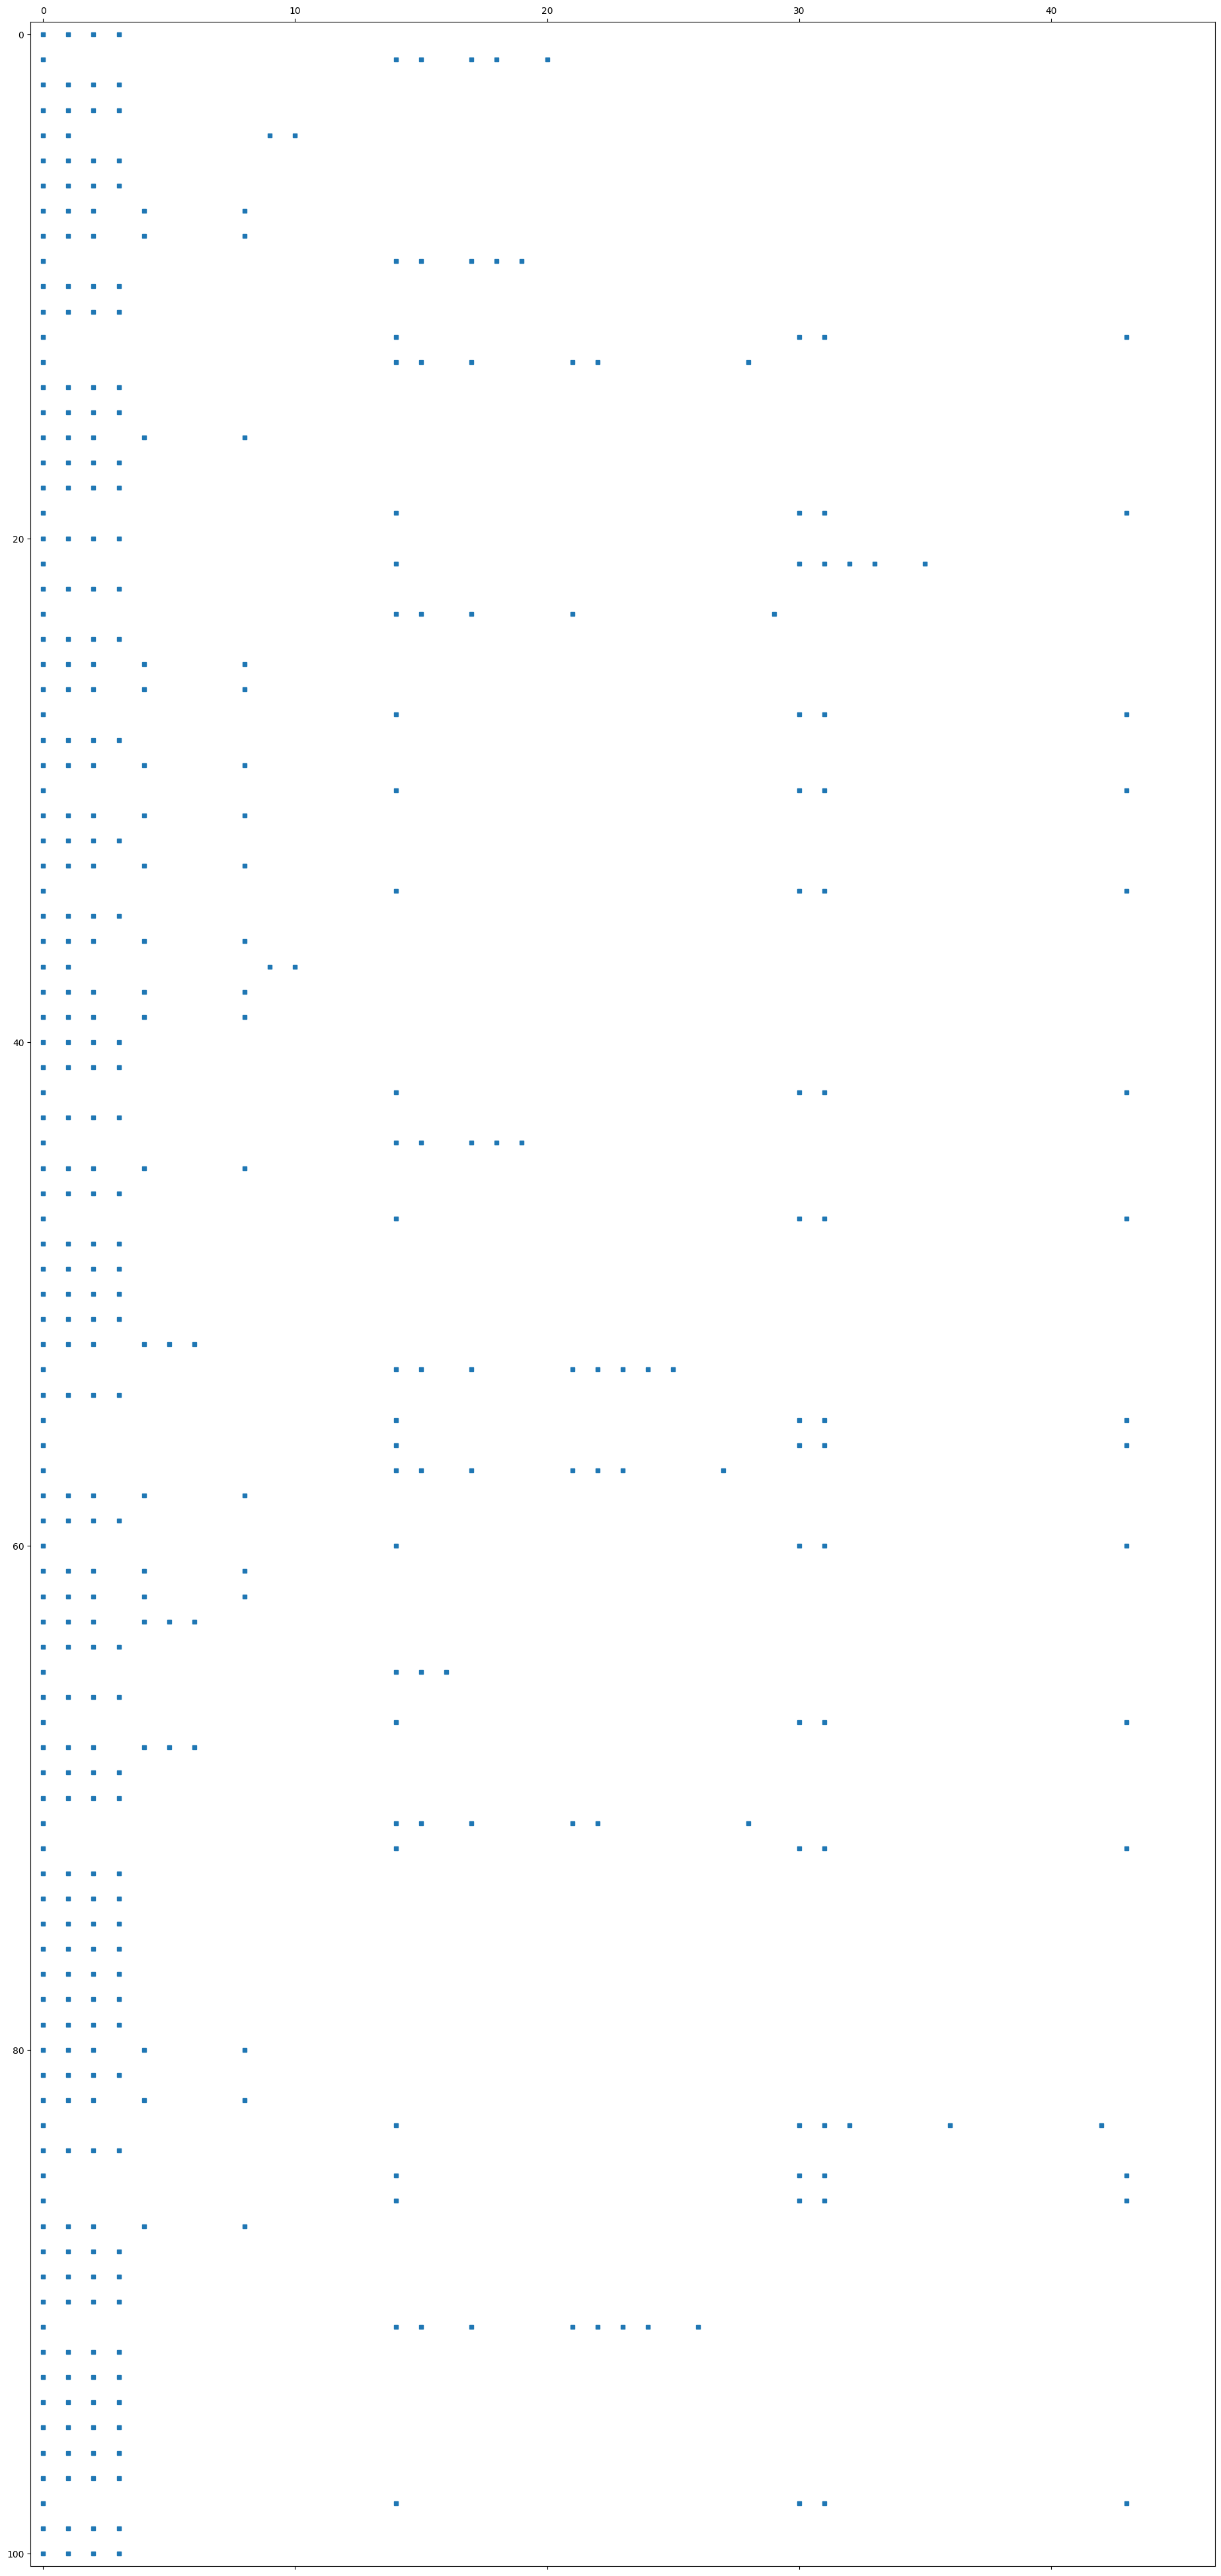

In [136]:
plt.figure(figsize=(40, 50))
plt.spy(sparse, markersize=5)

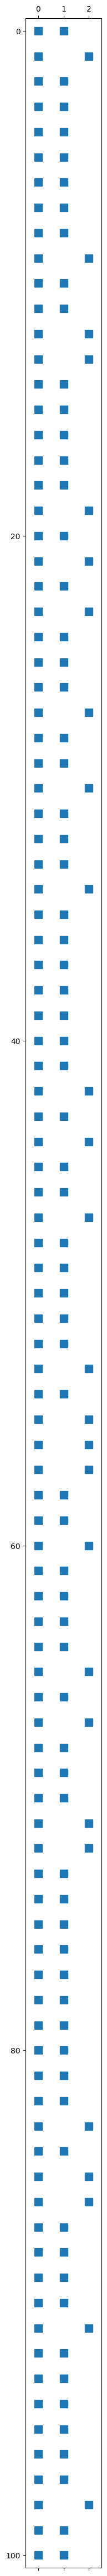

In [137]:
plt.figure(figsize=(40, 60))
plt.spy(sparse2, markersize=10)

In [138]:
from sklearn.metrics import accuracy_score

final_accuracy = accuracy_score(y_test, predictions)

print("Final Accuracy:", final_accuracy)


Final Accuracy: 0.9512195121951219


In [139]:

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9390243902439024
